#RESTAURANT REVENUE PREDICTION 

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis


###DATA FIELD 
Id : Restaurant id. 
Open Date : opening date for a restaurant
City : City that the restaurant is in. Note that there are unicode in the names. 
City Group: Type of the city. Big cities, or Other. 
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [ ]:
import random 
random.seed(123)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import operator as op

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Display output from multiple commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Importing and Cleaning

In [ ]:
df = pd.read_csv("/content/train.csv.zip")


In [ ]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# General info on the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
# Count the number of null values
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'P(revenue)'), Text(0.5, 0, 'revenue')]

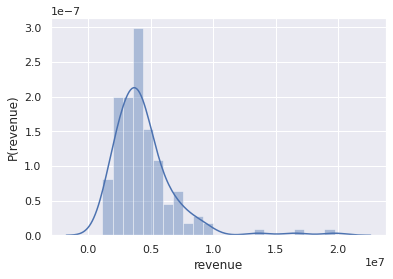

In [ ]:
df.describe()
sns.distplot(a=df['revenue'], kde=True).set(xlabel='revenue', ylabel='P(revenue)')

The histogram is showing that target vaiable is a right-skewed distribution.
There are outliers which have revenue >10.000.000 will effect the results. These outliers should be removed from the dataset.

In [ ]:
df.shape

(137, 43)

In [ ]:
df=df.drop(['Id'], axis=1)

In [ ]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
# Store categorical variable names in a list
ctg_vars = []

for col in df:
    if len(df[col].unique()) <= 30:
        ctg_vars.append(col)

In [ ]:
# Remove the P variables from categorical variables' list
i = 1
for k in range(1, 43):
    for p in ctg_vars:
        if p == "P" + str(i):
            ctg_vars.remove("P" + str(i))
            i += 1

In [ ]:
print(ctg_vars)

['City Group', 'Type']


In [ ]:
len(ctg_vars)

2

# Exploratory Data Analysis

In [ ]:
# Find the sets of categorical variables and numberical variales for feature analyses 
numerical_features = df.select_dtypes([np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()
print(categorical_features)
print(numerical_features)

['Open Date', 'City', 'City Group', 'Type']
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


In [ ]:
df['Open Date'] = pd.to_datetime(df['Open Date'], format= '%m/%d/%Y')
df['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2020'],[len(df)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format= '%m/%d/%Y' )
dateLastTrain.head()

df['OpenDays'] = dateLastTrain['Date'] - df['Open Date']
df['OpenDays'] = df['OpenDays'].astype('timedelta64[D]').astype(int)

,Date
0,2020-01-01
1,2020-01-01
2,2020-01-01
3,2020-01-01
4,2020-01-01


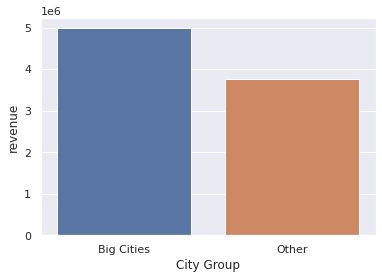

In [ ]:
cityPerc = df[['City Group', 'revenue']].groupby(['City Group'],as_index=False).mean()
sns.barplot(x= 'City Group', y='revenue', data=cityPerc)

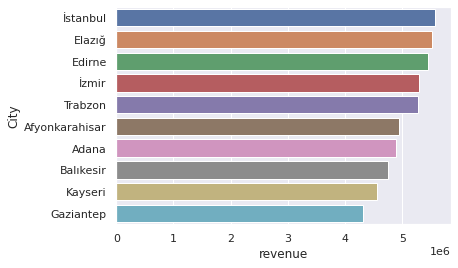

In [ ]:
cityPerc = df[['City','revenue']].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'],ascending= False)
sns.barplot(x='revenue', y='City', data=newDF.head(10))

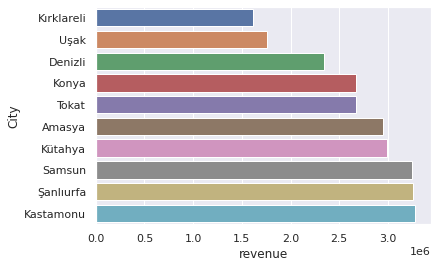

In [ ]:
cityPerc = df[['City','revenue']].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(['revenue'],ascending= True)
sns.barplot(x='revenue', y='City', data=newDF.head(10))

[Text(0.5, 1.0, 'Whisker plot')]

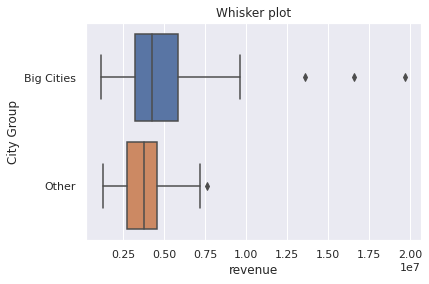

In [ ]:
#Revenue of big cities and other cities
ax_wp_1 = sns.boxplot(x='revenue', y='City Group', data=df)
ax_wp_1.set(title='Whisker plot');

bc_mean = df[df['City Group'] == 'Big Cities']['revenue'].mean()
oc_mean = df[df['City Group'] == 'Other']['revenue'].mean()


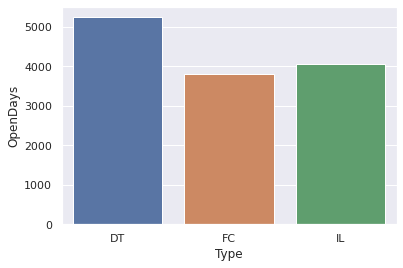

In [ ]:
cityPerc = df[['Type','OpenDays']].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='OpenDays', data=cityPerc)

Now let us convert the 'Open Date' feature in datetime format so that we can extract the month and year from it. We want to do this because the date doesn't give us any insight of the revenue. But the month and year surely does.

In [ ]:
df['Open Date'] = pd.to_datetime(df['Open Date'])


In [ ]:
df['month']=[x.month for x in df['Open Date']]

In [ ]:
df['year']=[x.year for x in df['Open Date']]

<Figure size 1080x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


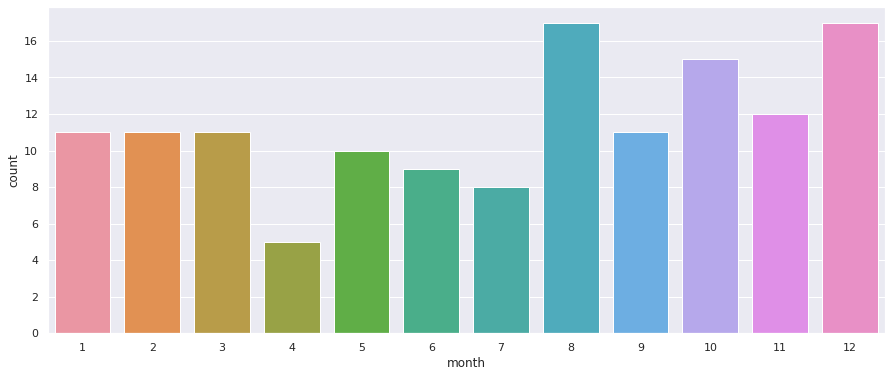

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['month'])

From the above plot we can look at the occurence of various months in the dataset. We have the most data for the last 5 months. The highest of them is from August and December. Now let's see in which month did we have the most revenue. For this let us to find the mean of the revenue for each month.

In [ ]:
df.groupby('month')['revenue'].mean()

month
1     5.900851e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    5.236838e+06
11    4.721400e+06
12    4.299763e+06
Name: revenue, dtype: float64

From here we can see that the month January gave the most revenue to the restraunts. September and October followed January. Let's try to plot a bargraph with the same and visualize the same trends.

In [ ]:
# Encoding Categorical Variable
cat_vars = ['City', 'City Group', 'Type']
for i in cat_vars:
    df[i+"_cat"] = df[i].astype('category').cat.codes
# df.drop(cat_vars, axis=1, inplace=True)
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,month,year,City_cat,City Group_cat,Type_cat
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7473,7,1999,31,0,2
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,4339,2,2008,3,0,1
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2489,3,2013,10,1,2
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2890,2,2012,28,1,2
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,3889,5,2009,14,1,2


<Figure size 1080x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


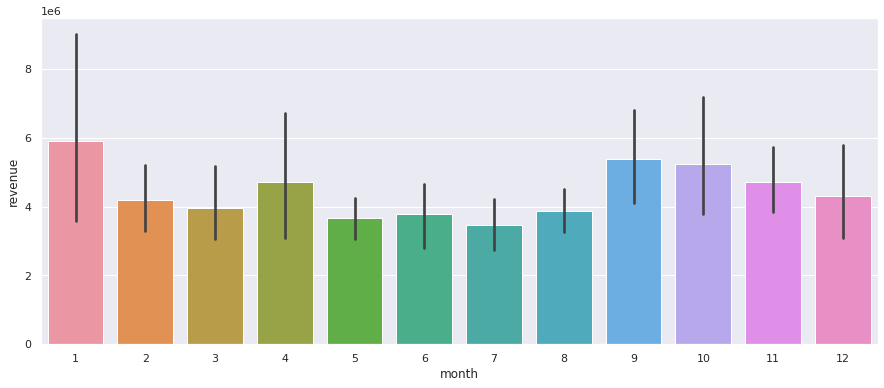

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('month','revenue',data=df)

So these bargraphs are giving out the same information. Now lets try to do same kind of stuffs for the newly generated feature 'year'.

<Figure size 1080x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


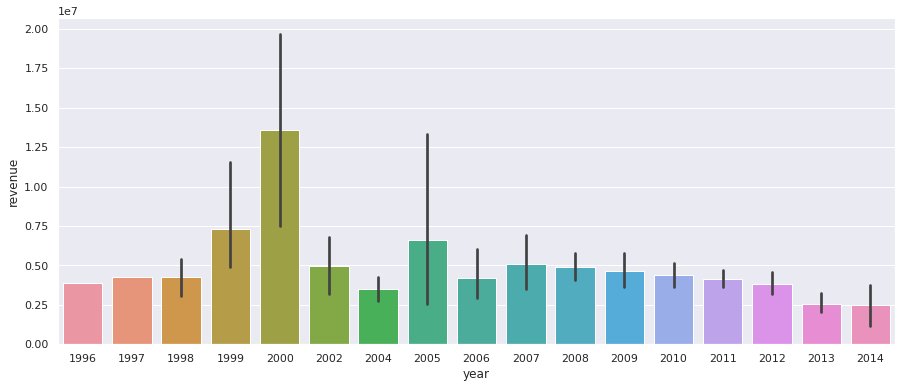

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot('year','revenue',data=df)

Out of all the years, the highest revenue was generated in the year 2000 and after that 1999 and 2005.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


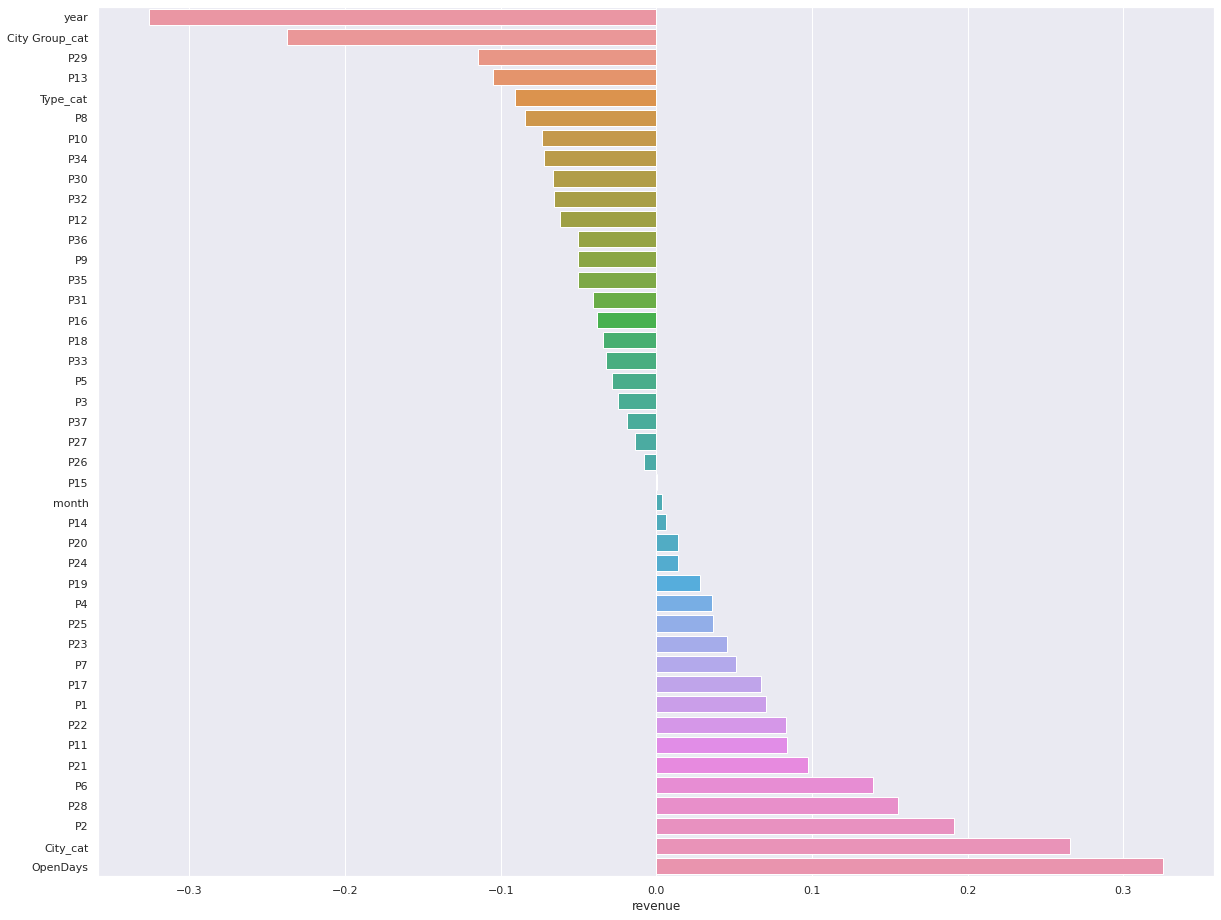

In [ ]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(20,16))
target_corr = df[df.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).revenue[:-1]
sns.barplot(x, y, orient='h')
plt.show()

So these bargraphs are giving out the same information. Now lets try to do same kind of stuffs for the newly generated feature 'year'.

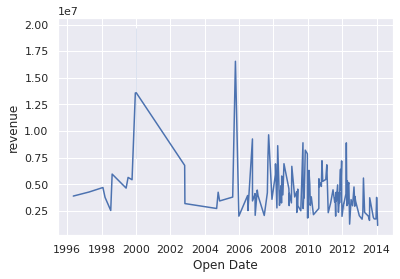

In [ ]:
# Time Series of revenues generated
df_timeseries = pd.read_csv('/content/train.csv.zip',
                             parse_dates=['Open Date'],
                             index_col= ['Open Date'],
                             na_values=['999.99'])
sns.lineplot(data=df_timeseries, x='Open Date', y='revenue')
plt.show()



```
# This is formatted as code
```

#Imputing P values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# P variables will be considered as continous variables rather than categorical variables
imp_train = IterativeImputer(max_iter=5, random_state=0, missing_values=0, sample_posterior = True, min_value=1)
p_vals = ["P" + str(i) for i in range(1, 38)]
df[p_vals] = np.round(imp_train.fit_transform(df[p_vals]))

In [ ]:
data_temp = df.copy()

In [ ]:
data_temp.drop('Open Date', axis=1, inplace=True)
data_temp.drop('City', axis=1, inplace=True)

In [ ]:
data_temp['revenue'] = np.log1p(data_temp['revenue'])

In [ ]:
data_temp.to_csv('train_data_modified.csv', index=False)

In [ ]:
data_temp.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,month,year,City_cat,City Group_cat,Type_cat
0,Big Cities,IL,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,15.547830,7473,7,1999,31,0,2
1,Big Cities,FC,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,6.0,2.0,2.0,4.0,2.0,3.0,15.750379,4339,2,2008,3,0,1
2,Other,IL,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,4.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,6.0,1.0,3.0,12.0,2.0,7.0,2.0,7.0,5.0,7.0,5.0,14.535971,2489,3,2013,10,1,2
3,Other,IL,6.0,4.0,6.0,6.0,4.0,4.0,10.0,8.0,10.0,10.0,8.0,10.0,8.0,6.0,4.0,9.0,3.0,12.0,20.0,12.0,6.0,1.0,10.0,2.0,2.0,2.0,2.0,2.0,8.0,25.0,12.0,10.0,6.0,18.0,12.0,12.0,6.0,14.799651,2890,2,2012,28,1,2
4,Other,IL,3.0,4.0,3.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,5.0,1.0,3.0,5.0,1.0,3.0,2.0,3.0,4.0,3.0,3.0,15.278005,3889,5,2009,14,1,2


# Data Pipelining 

Analyzing numerical features distribution

(0.0, 0.22519346847728638)

(0.0, 0.32777448310484525)

(0.0, 0.7075614659465412)

(0.0, 0.582076306917034)

(0.0, 0.48929455914408515)

(0.0, 0.28351192348692655)

(0.0, 0.35829212933236326)

(0.0, 0.3637332943889673)

(0.0, 0.41055729043750383)

(0.0, 0.41673228344539714)

(0.0, 0.2429083941988277)

(0.0, 0.37228149570255903)

(0.0, 0.5774197291119052)

(0.0, 0.178980478665001)

(0.0, 0.1902139612165913)

(0.0, 0.17395645193601733)

(0.0, 0.17334196194090282)

(0.0, 0.20377848783186545)

(0.0, 0.1351753574164006)

(0.0, 0.1514247608110895)

(0.0, 0.34087008320774714)

(0.0, 0.357477259302744)

(0.0, 0.1674090475166917)

(0.0, 0.21031871453179743)

(0.0, 0.240041003230435)

(0.0, 0.17285809442232555)

(0.0, 0.17932466261081076)

(0.0, 0.2642802233147435)

(0.0, 0.40992158421356273)

(0.0, 0.09766192688555166)

(0.0, 0.1455180564235139)

(0.0, 0.09337351059608029)

(0.0, 0.3335621308737523)

(0.0, 0.12811502098073874)

(0.0, 0.1682194440377419)

(0.0, 0.1561972964021903)

(0.0, 0.2311110224058046)

(0.0, 2.2362589580815184e-07)

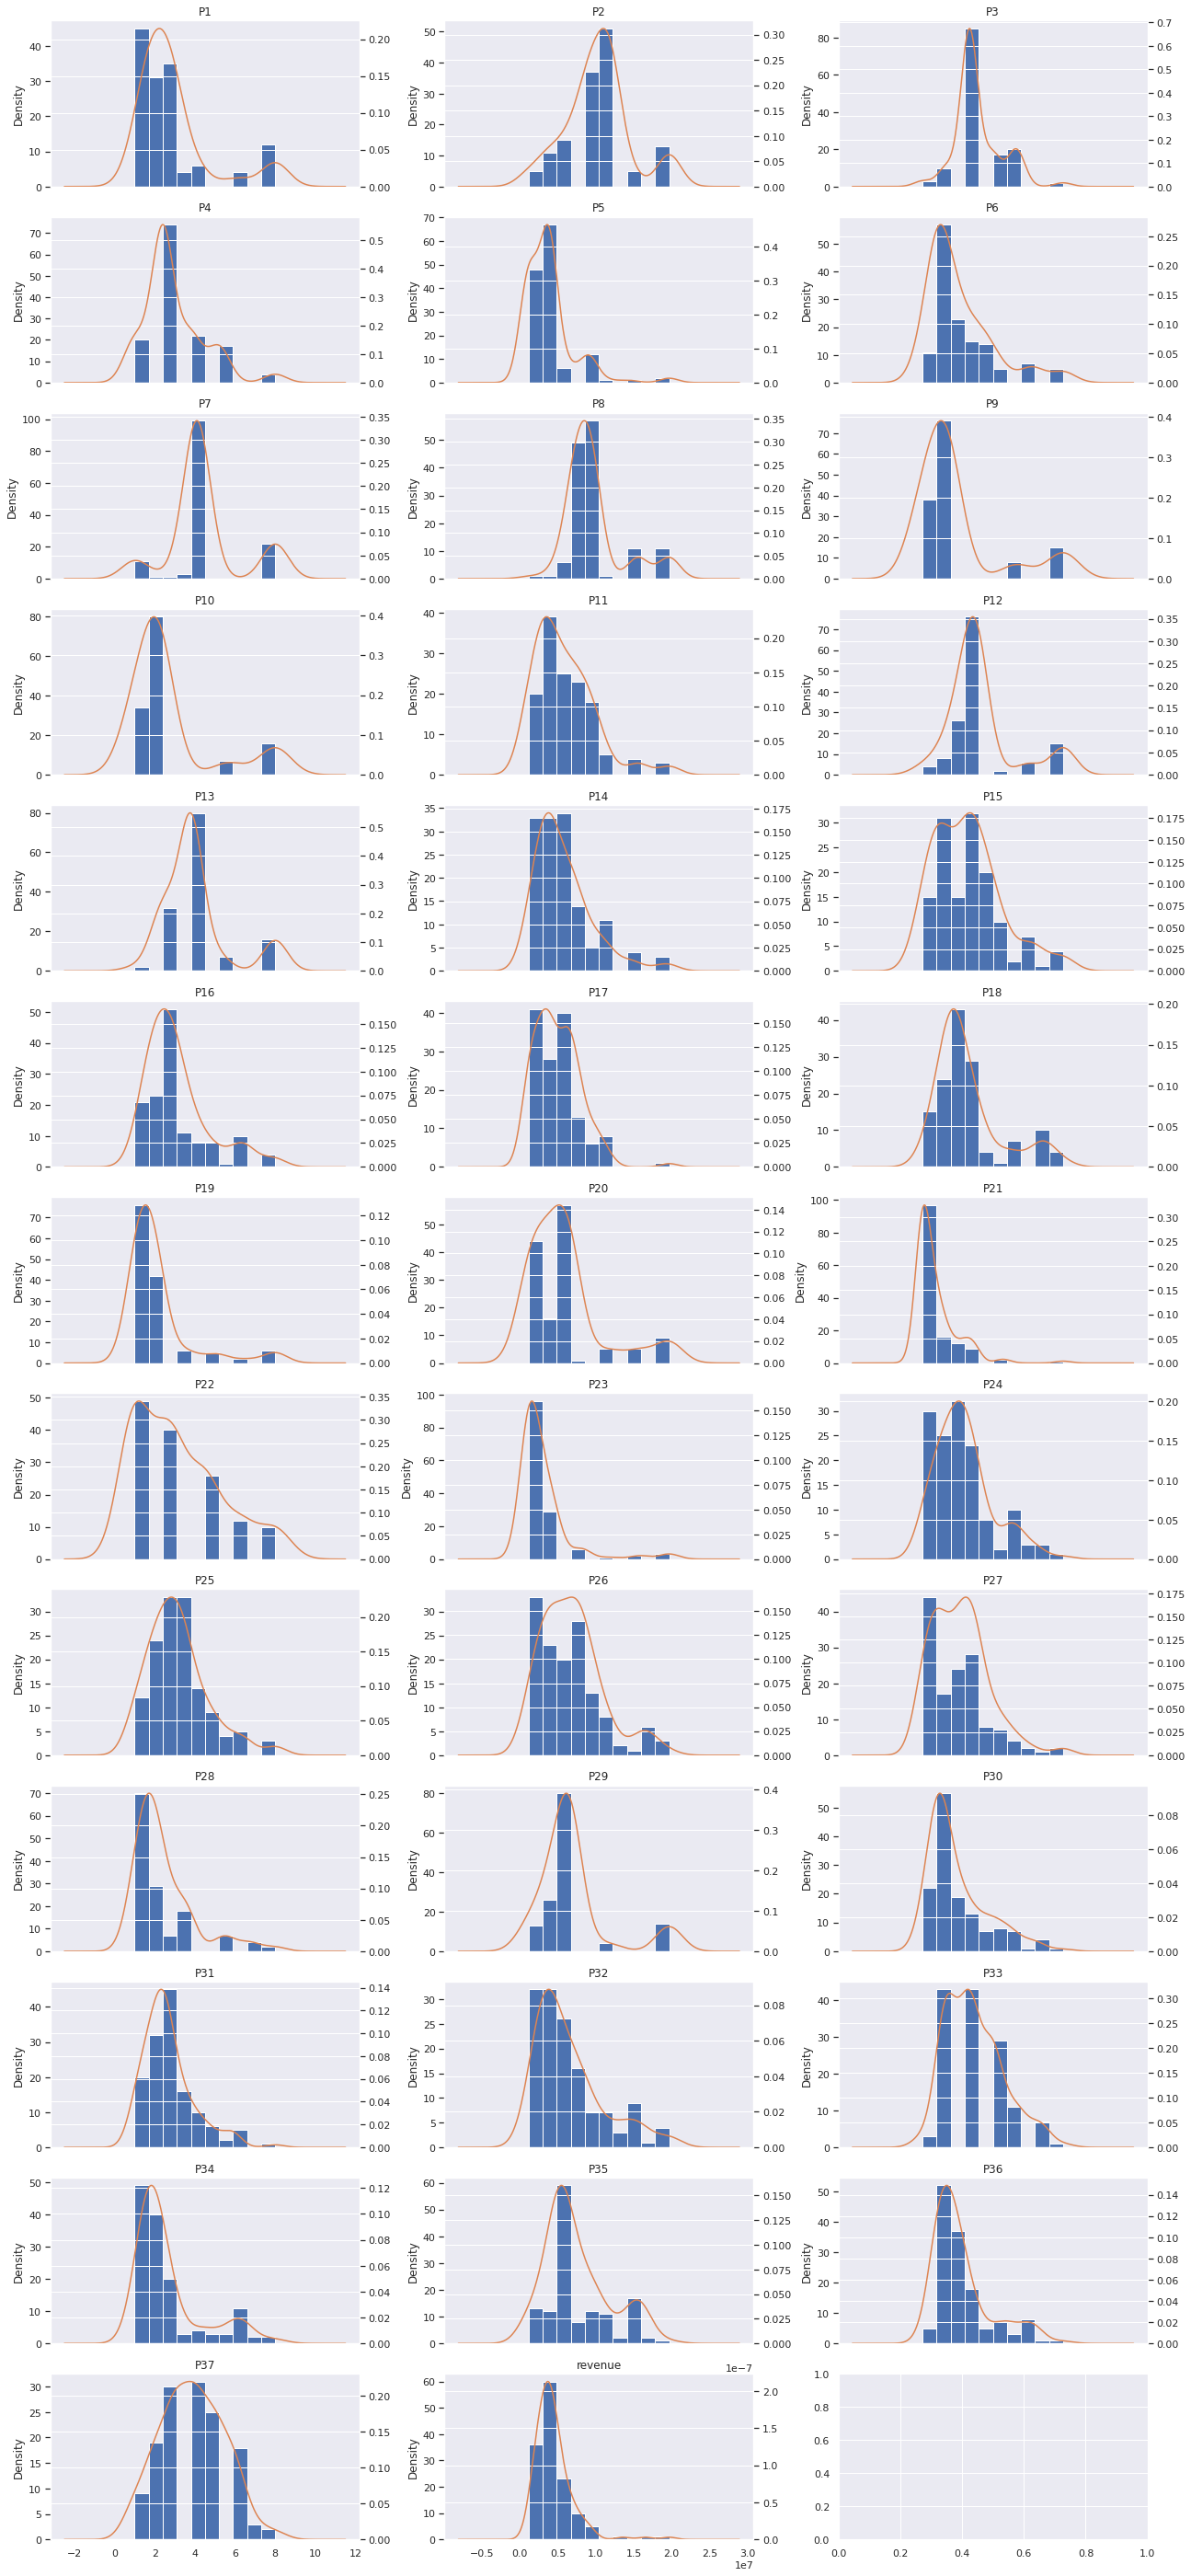

In [ ]:
n = len(df[numerical_features].columns)
w = 3
h = (n - 1) // w + 1
fig, axes = plt.subplots(h, w, figsize=(w * 6, h * 3))
for i, (name, col) in enumerate(df[numerical_features].items()):
    r, c = i // w, i % w
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

According to these histograms, it is clearly showing that most of the distributions are right-skewed. These non-normal distributions need to be studied carefully.

Analyzing categorical featrues

Text(0.5, 0, 'Open Date')

Text(0, 0.5, 'Total Revenue')

Text(0.5, 0, 'City')

Text(0, 0.5, 'Total Revenue')

Text(0.5, 0, 'City Group')

Text(0, 0.5, 'Total Revenue')

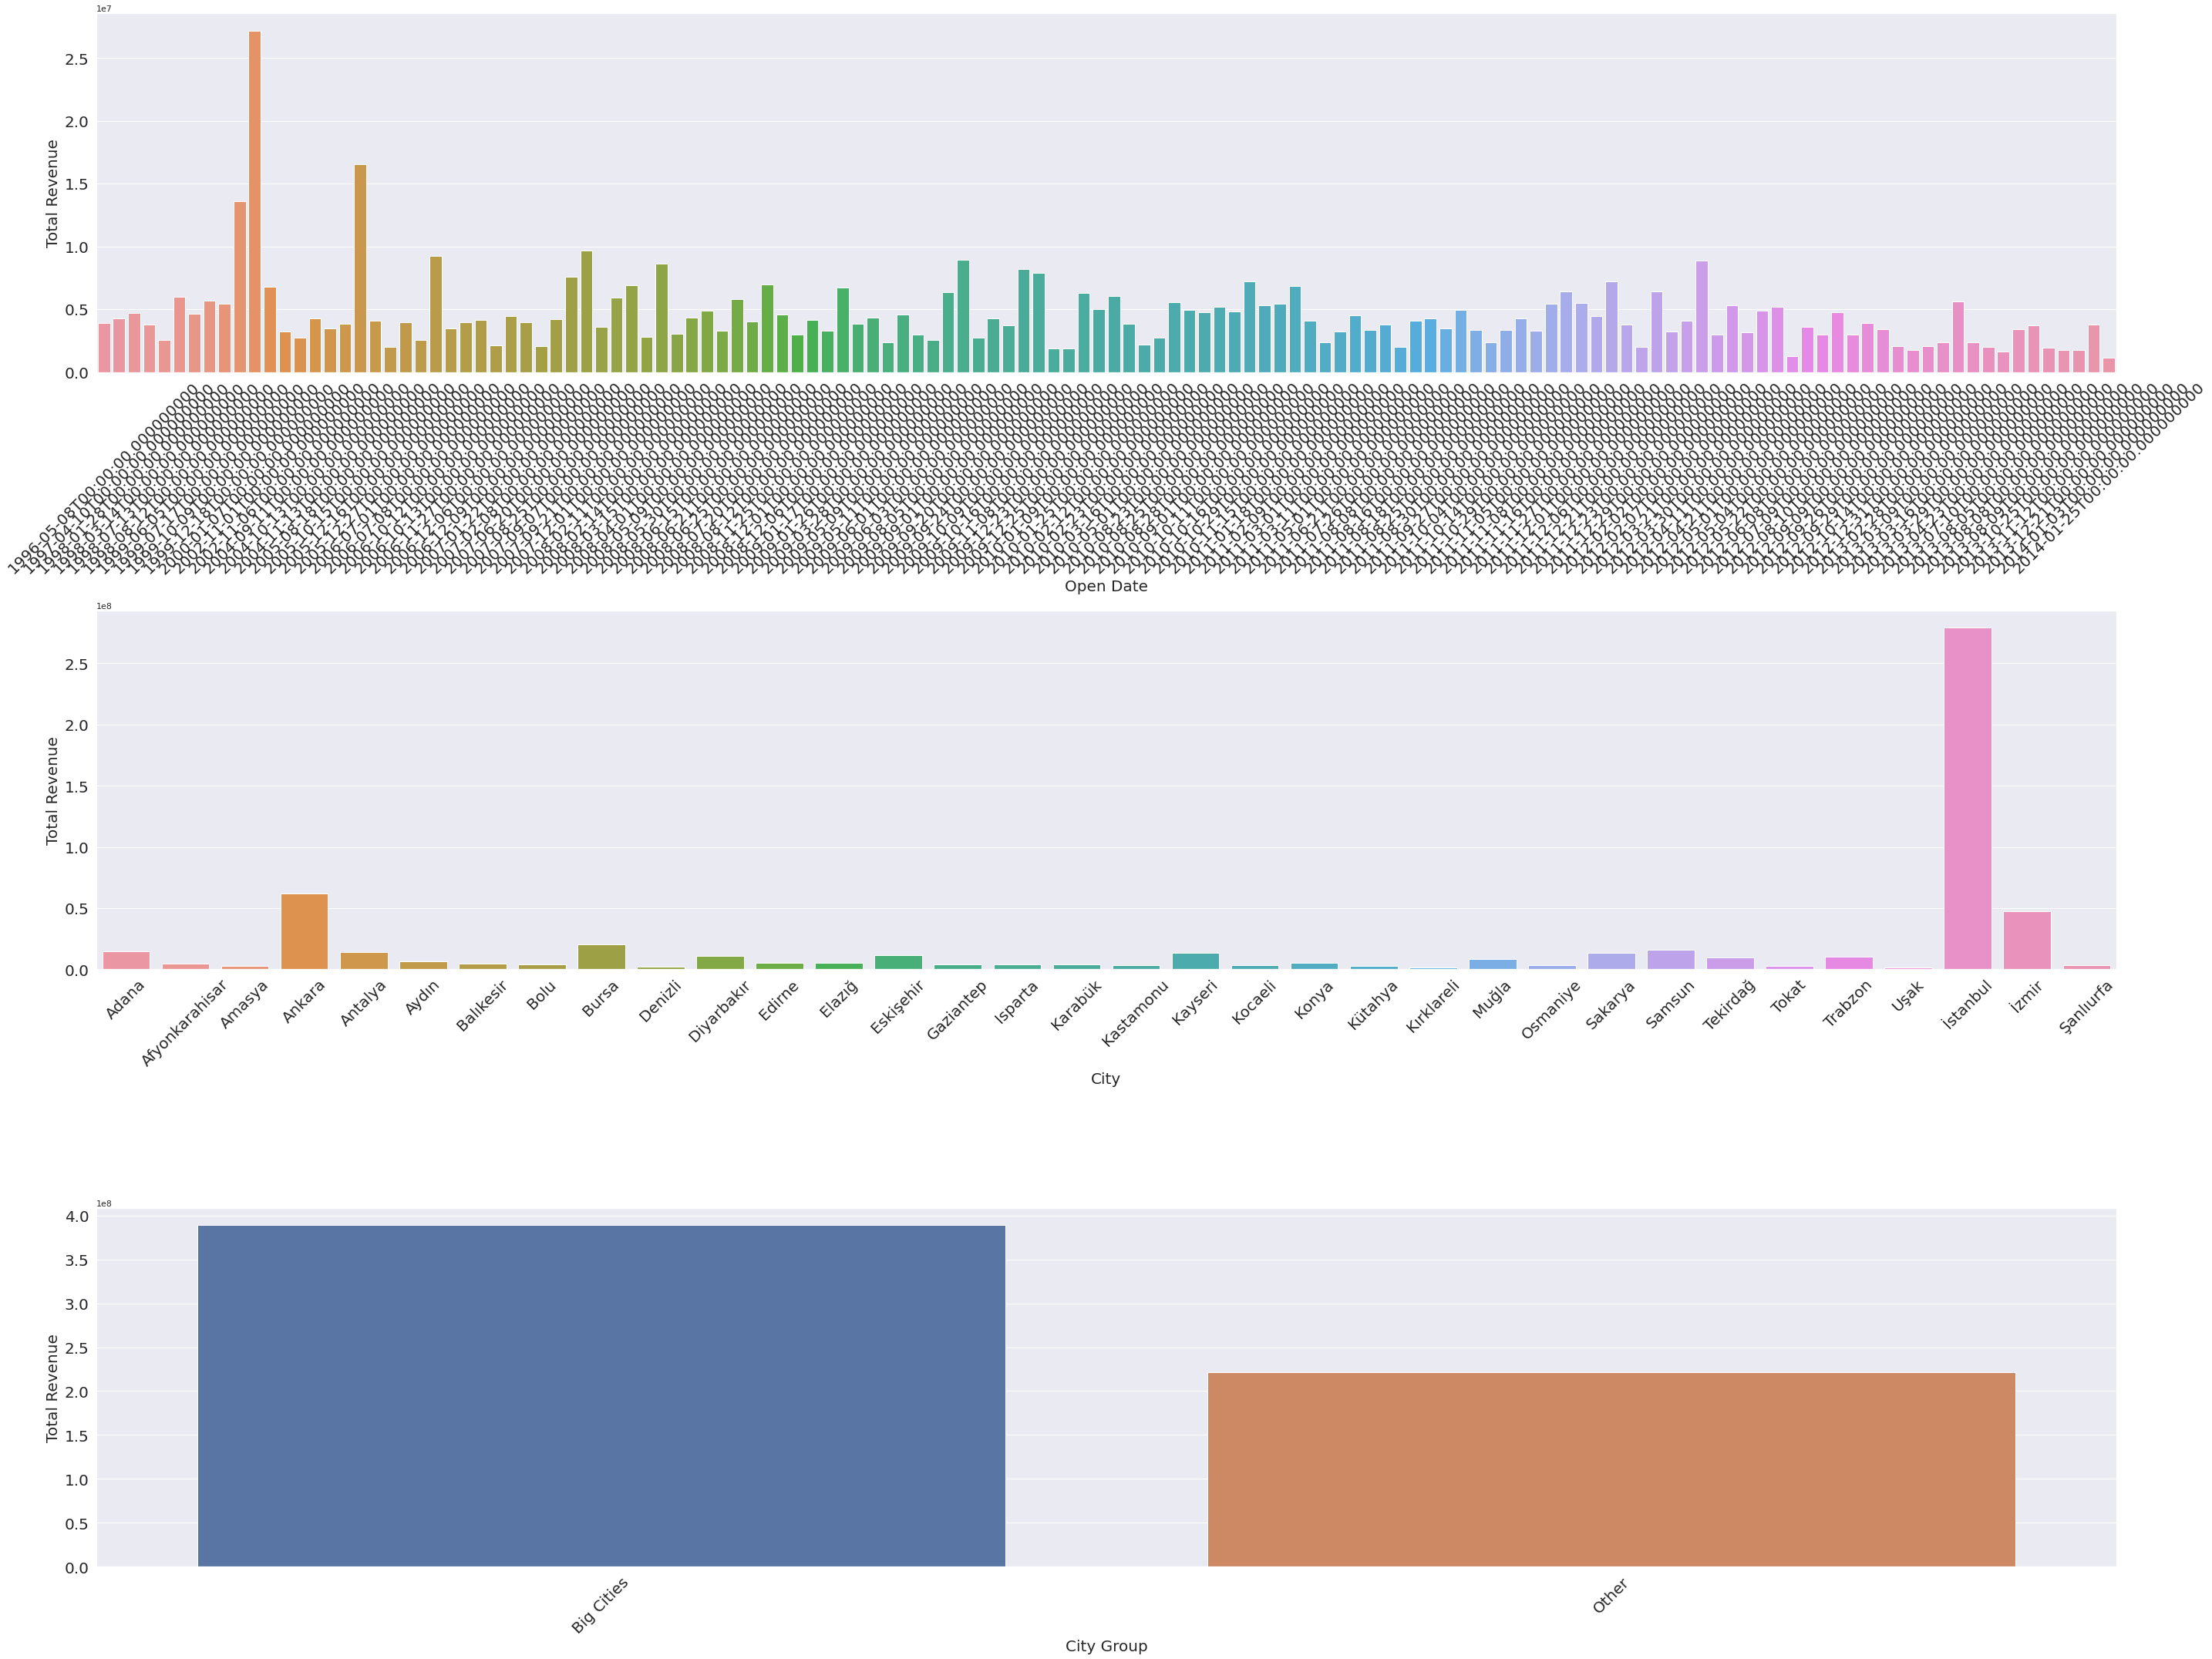

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = df[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Total Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(20)
    for label in subplot.get_yticklabels():
        label.set_size(20)
fig.tight_layout()

1. Restaurants in Istabul earn the most revenue in the dataset.
2. Restaurants in the big cities have higher total revenue than the others.
3. Restaurants in FC and IL city types have much higher total revenue than DT city type.

Relationships Between Attributes and Target Variables "Revenue":
Numerical Attributes

Text(0.5, 0, 'P1')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P2')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P3')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P4')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P5')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P6')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P7')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P8')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P9')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P10')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P11')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P12')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P13')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P14')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P15')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P16')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P17')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P18')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P19')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P20')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P21')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P22')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P23')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P24')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P25')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P26')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P27')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P28')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P29')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P30')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P31')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P32')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P33')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P34')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P35')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P36')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'P37')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'revenue')

Text(0, 0.5, 'Revenue')

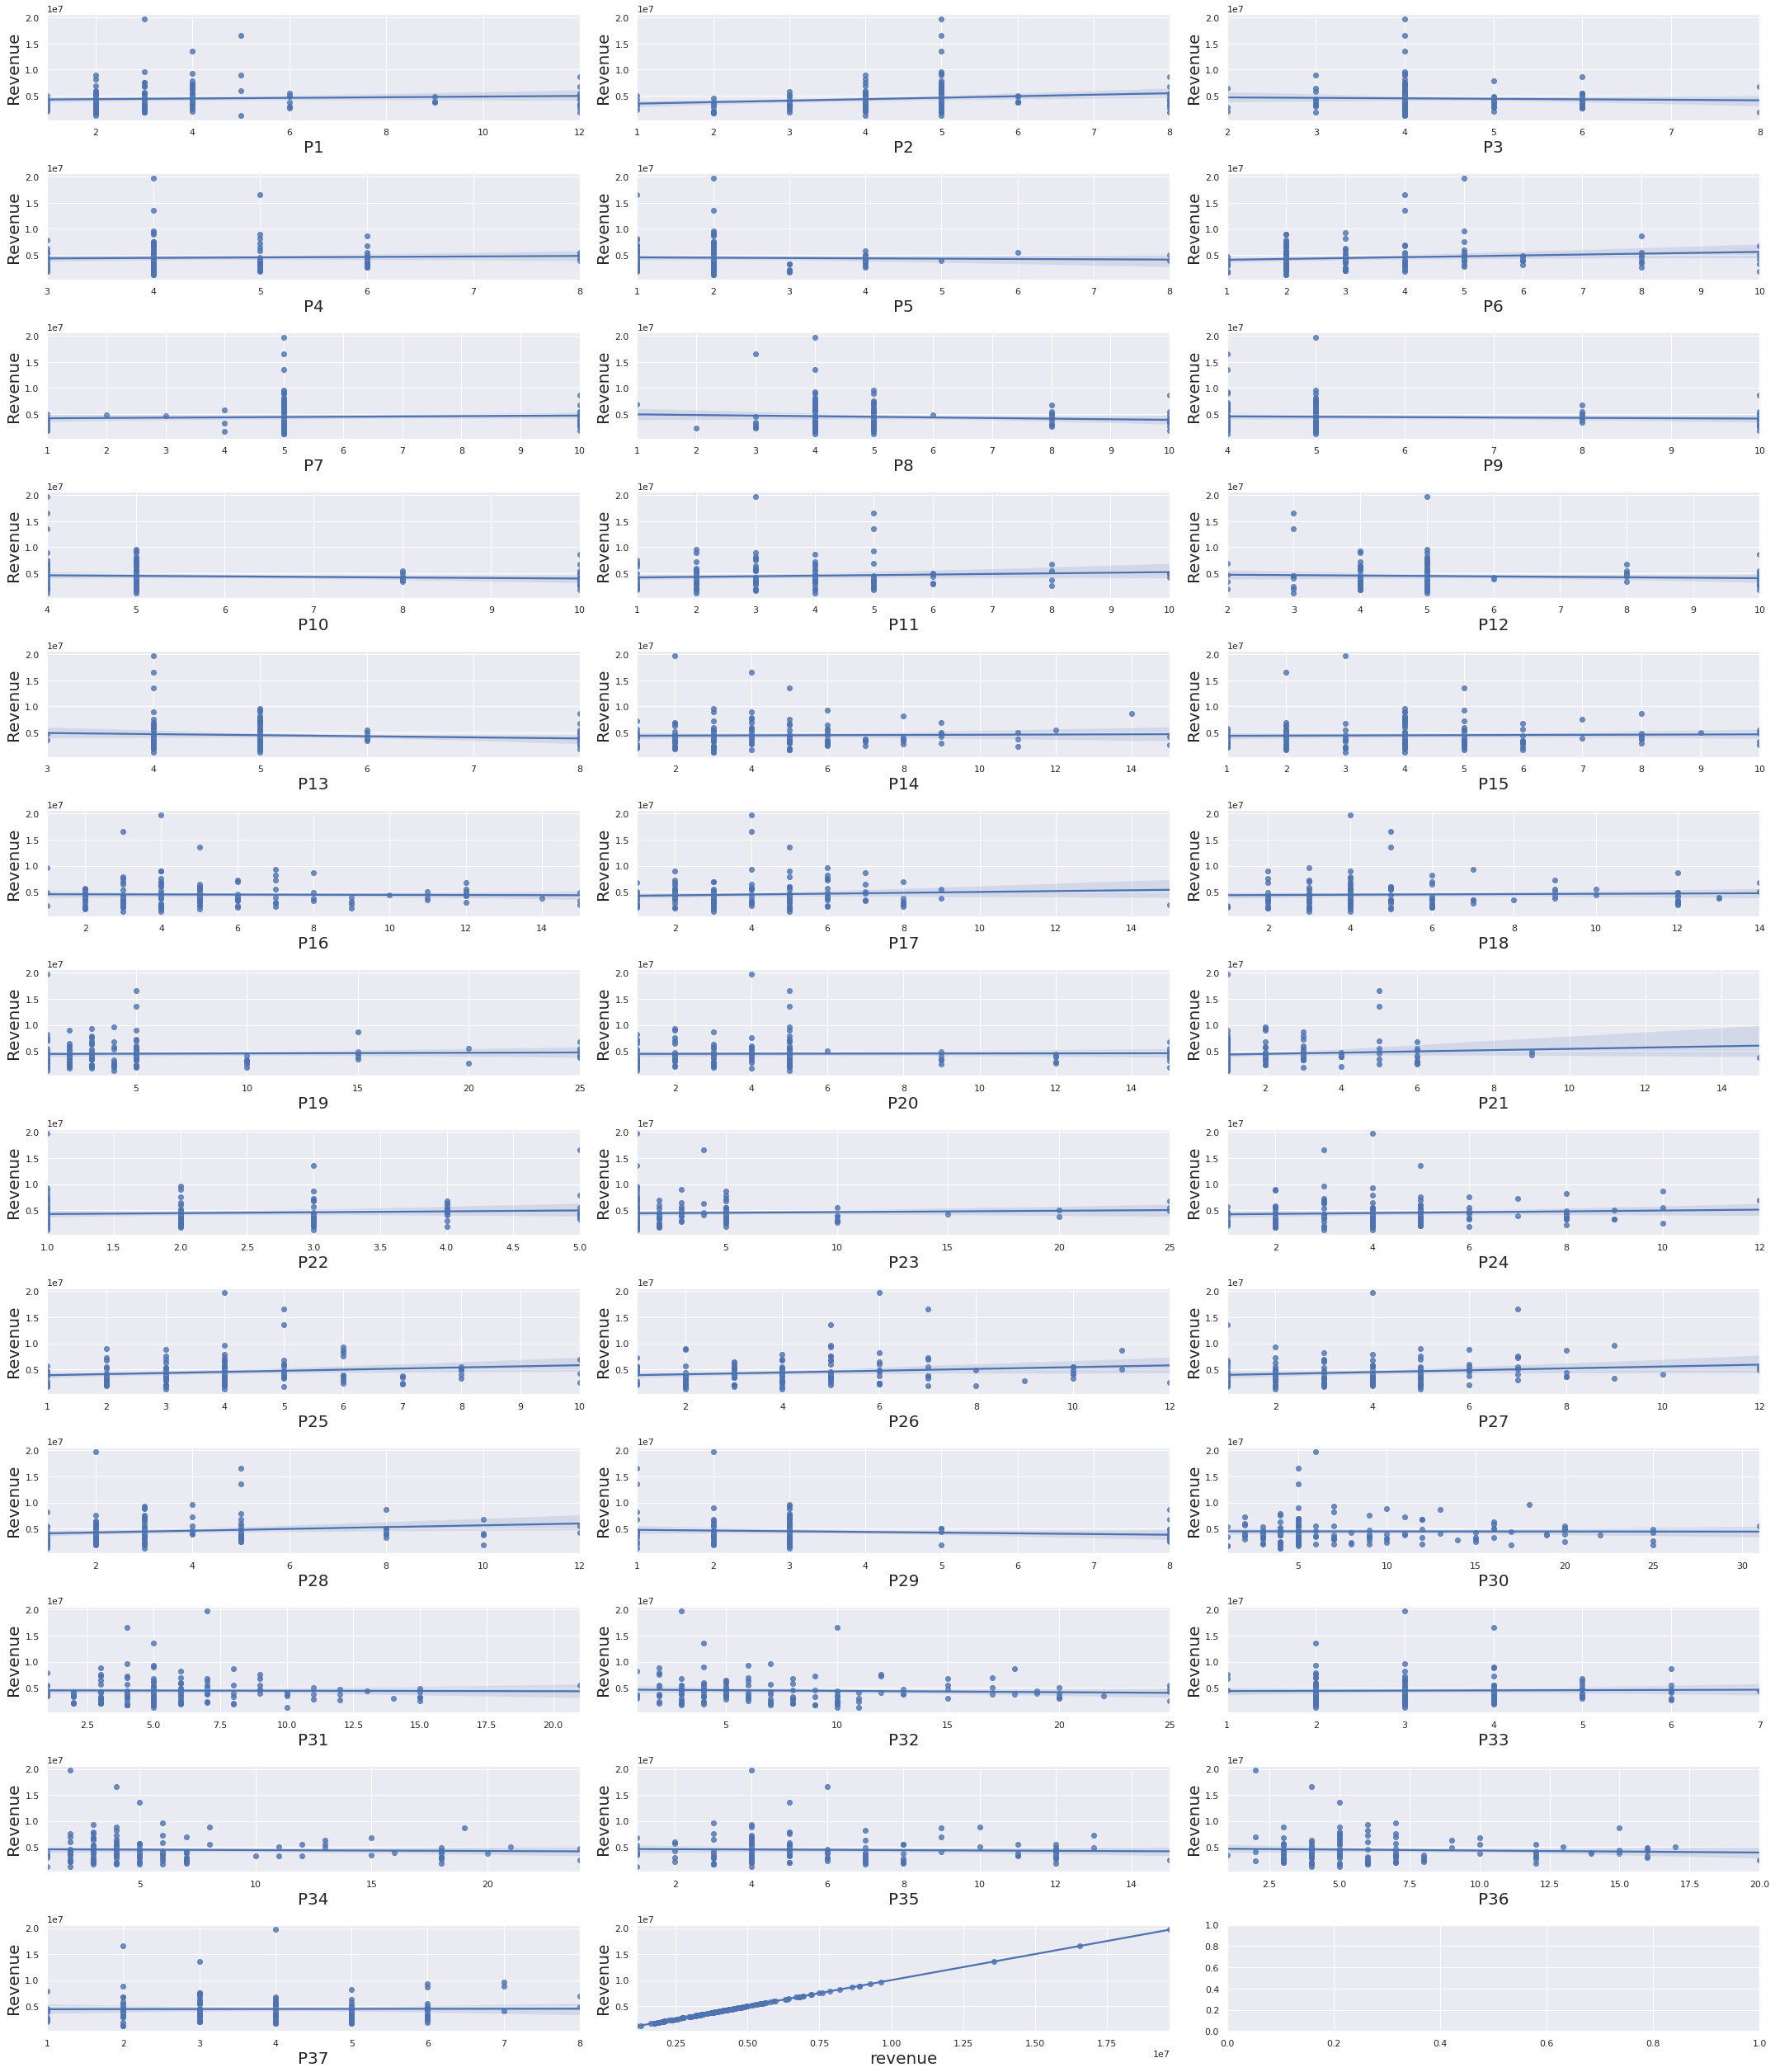

In [ ]:
fig, ax = plt.subplots(13, 3, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=df[variable], y=df['revenue'], ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Revenue',fontsize=20)
fig.tight_layout()

<Figure size 3240x1800 with 0 Axes>

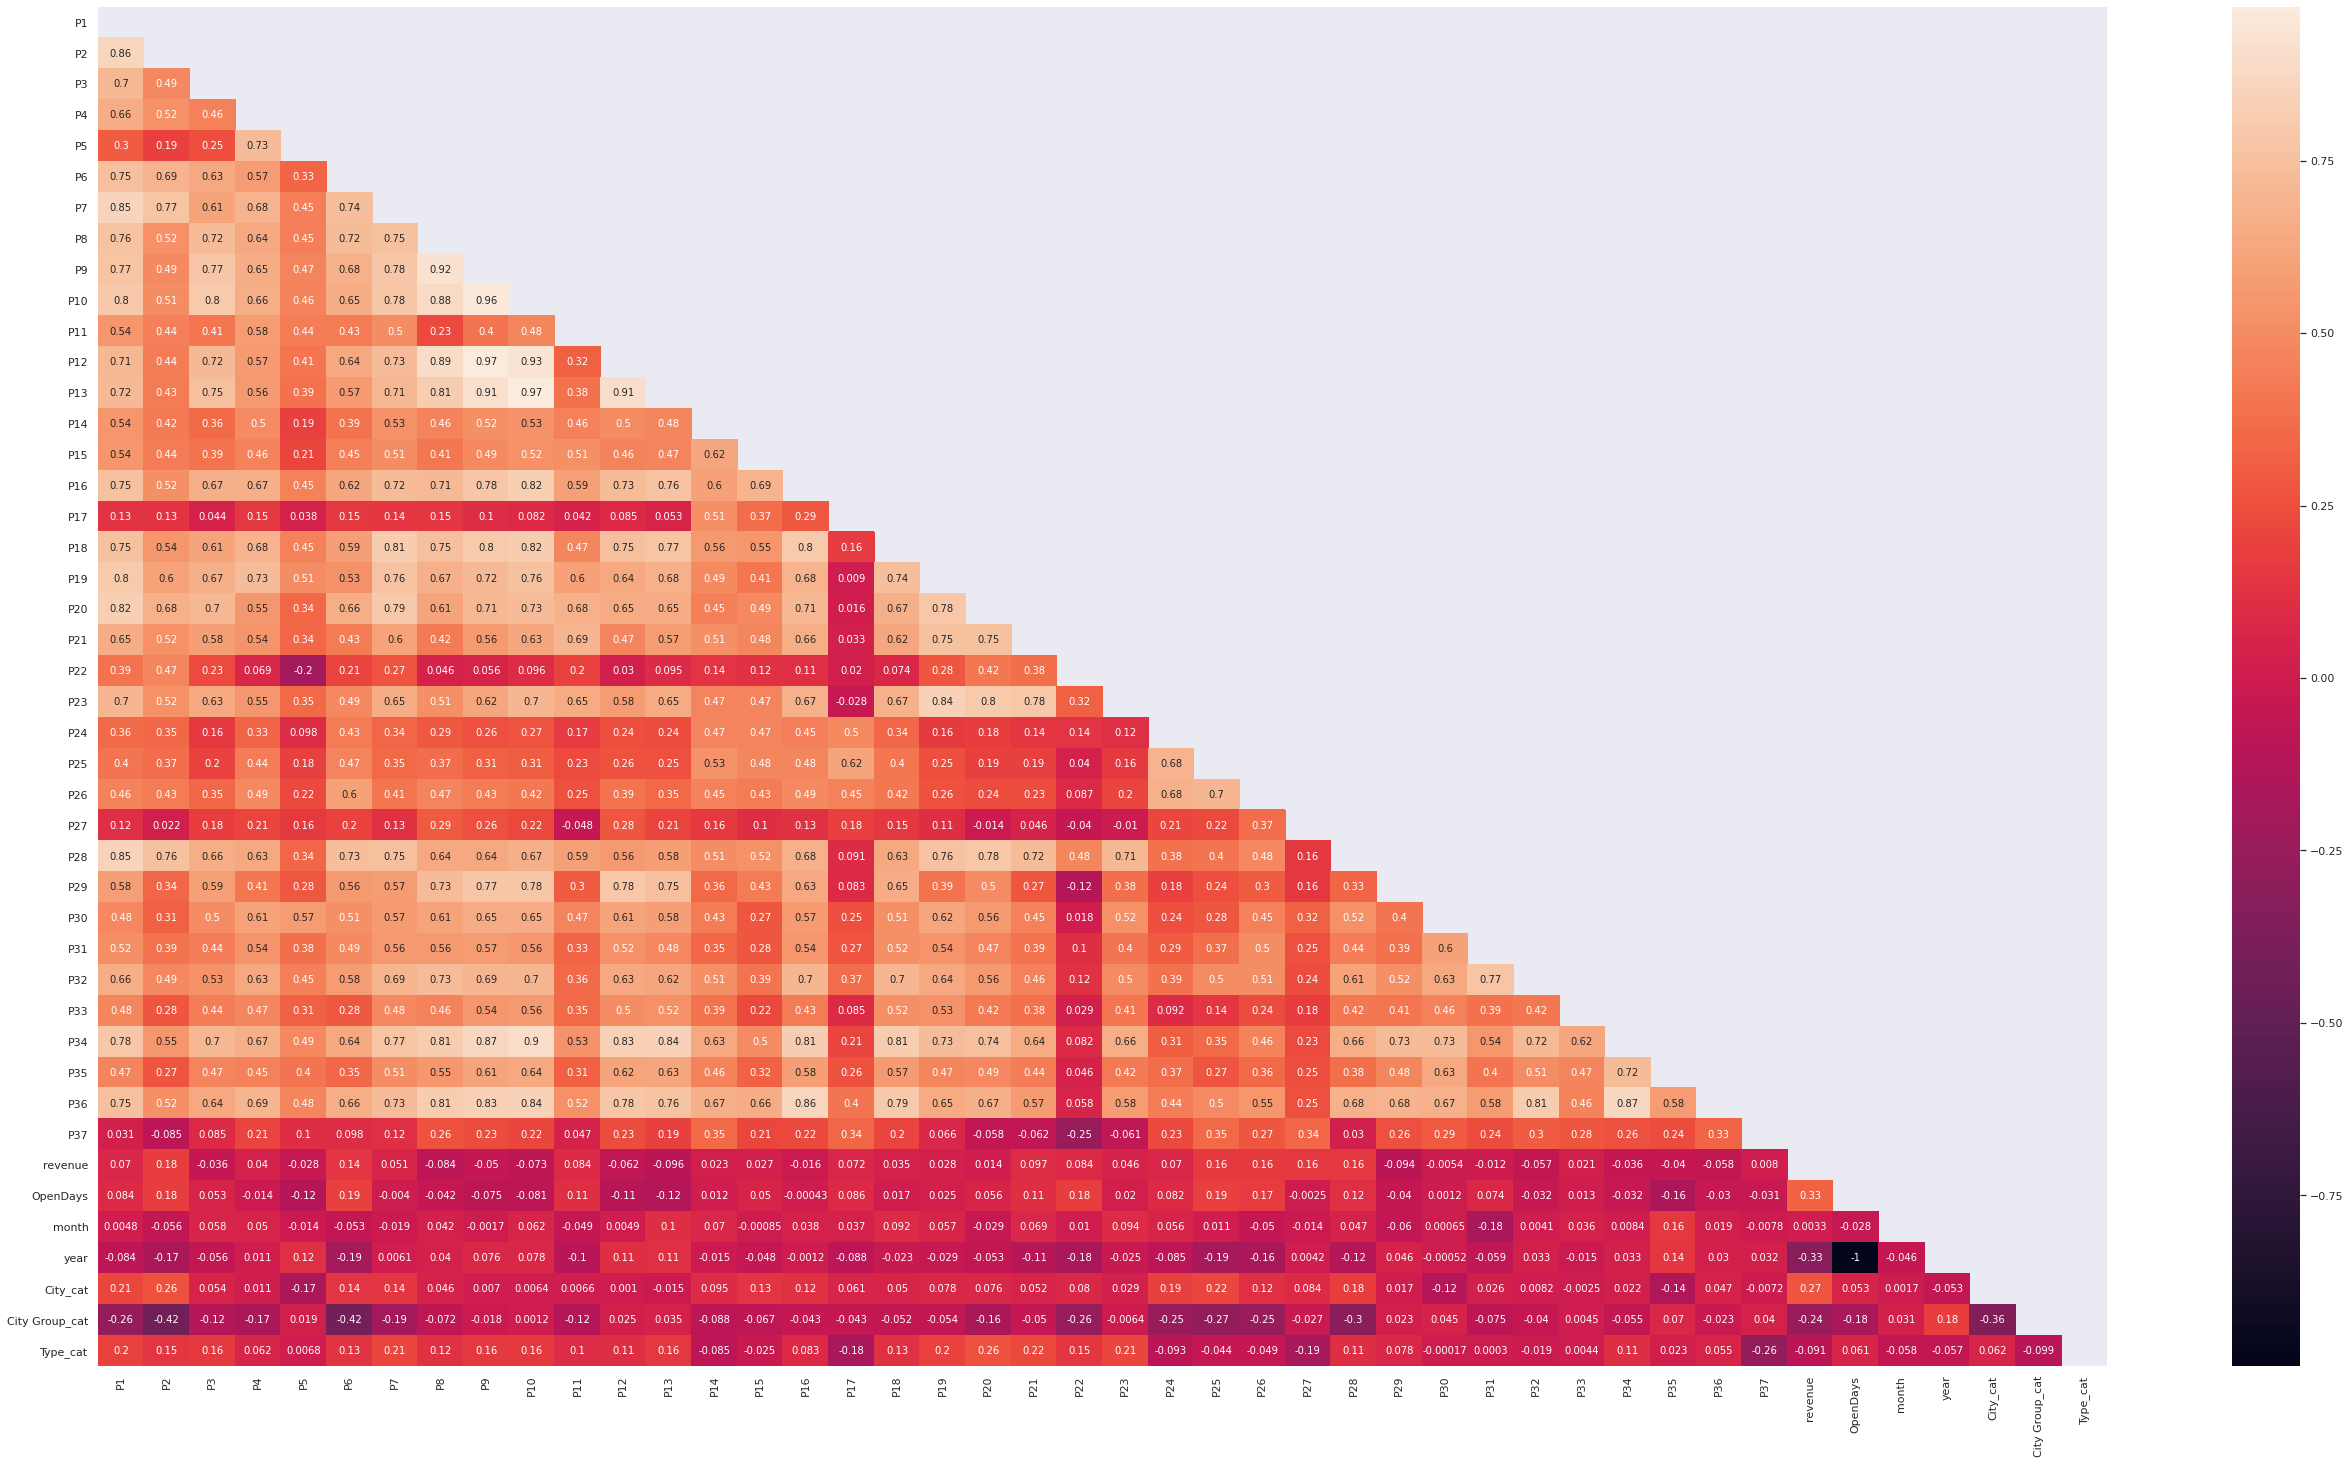

In [ ]:
plt.figure(figsize=(45,25))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),annot=True, mask=mask)
sns.set(font_scale=1.4)

According to linear regression graphs and heatmap of correlation scores, these numerical attributes have very weak linear relationship with the target variable "Revenue". The highest correlation score is 'Age' which is 0.2, meanwhile the others have nearly 0 correlation score. However, there are groups of attributes which have high correlation to each others.


Text(0.5, 0, 'Open Date')

Text(0, 0.5, 'Revenue')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'City')

Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'City Group')

Text(0, 0.5, 'Revenue')

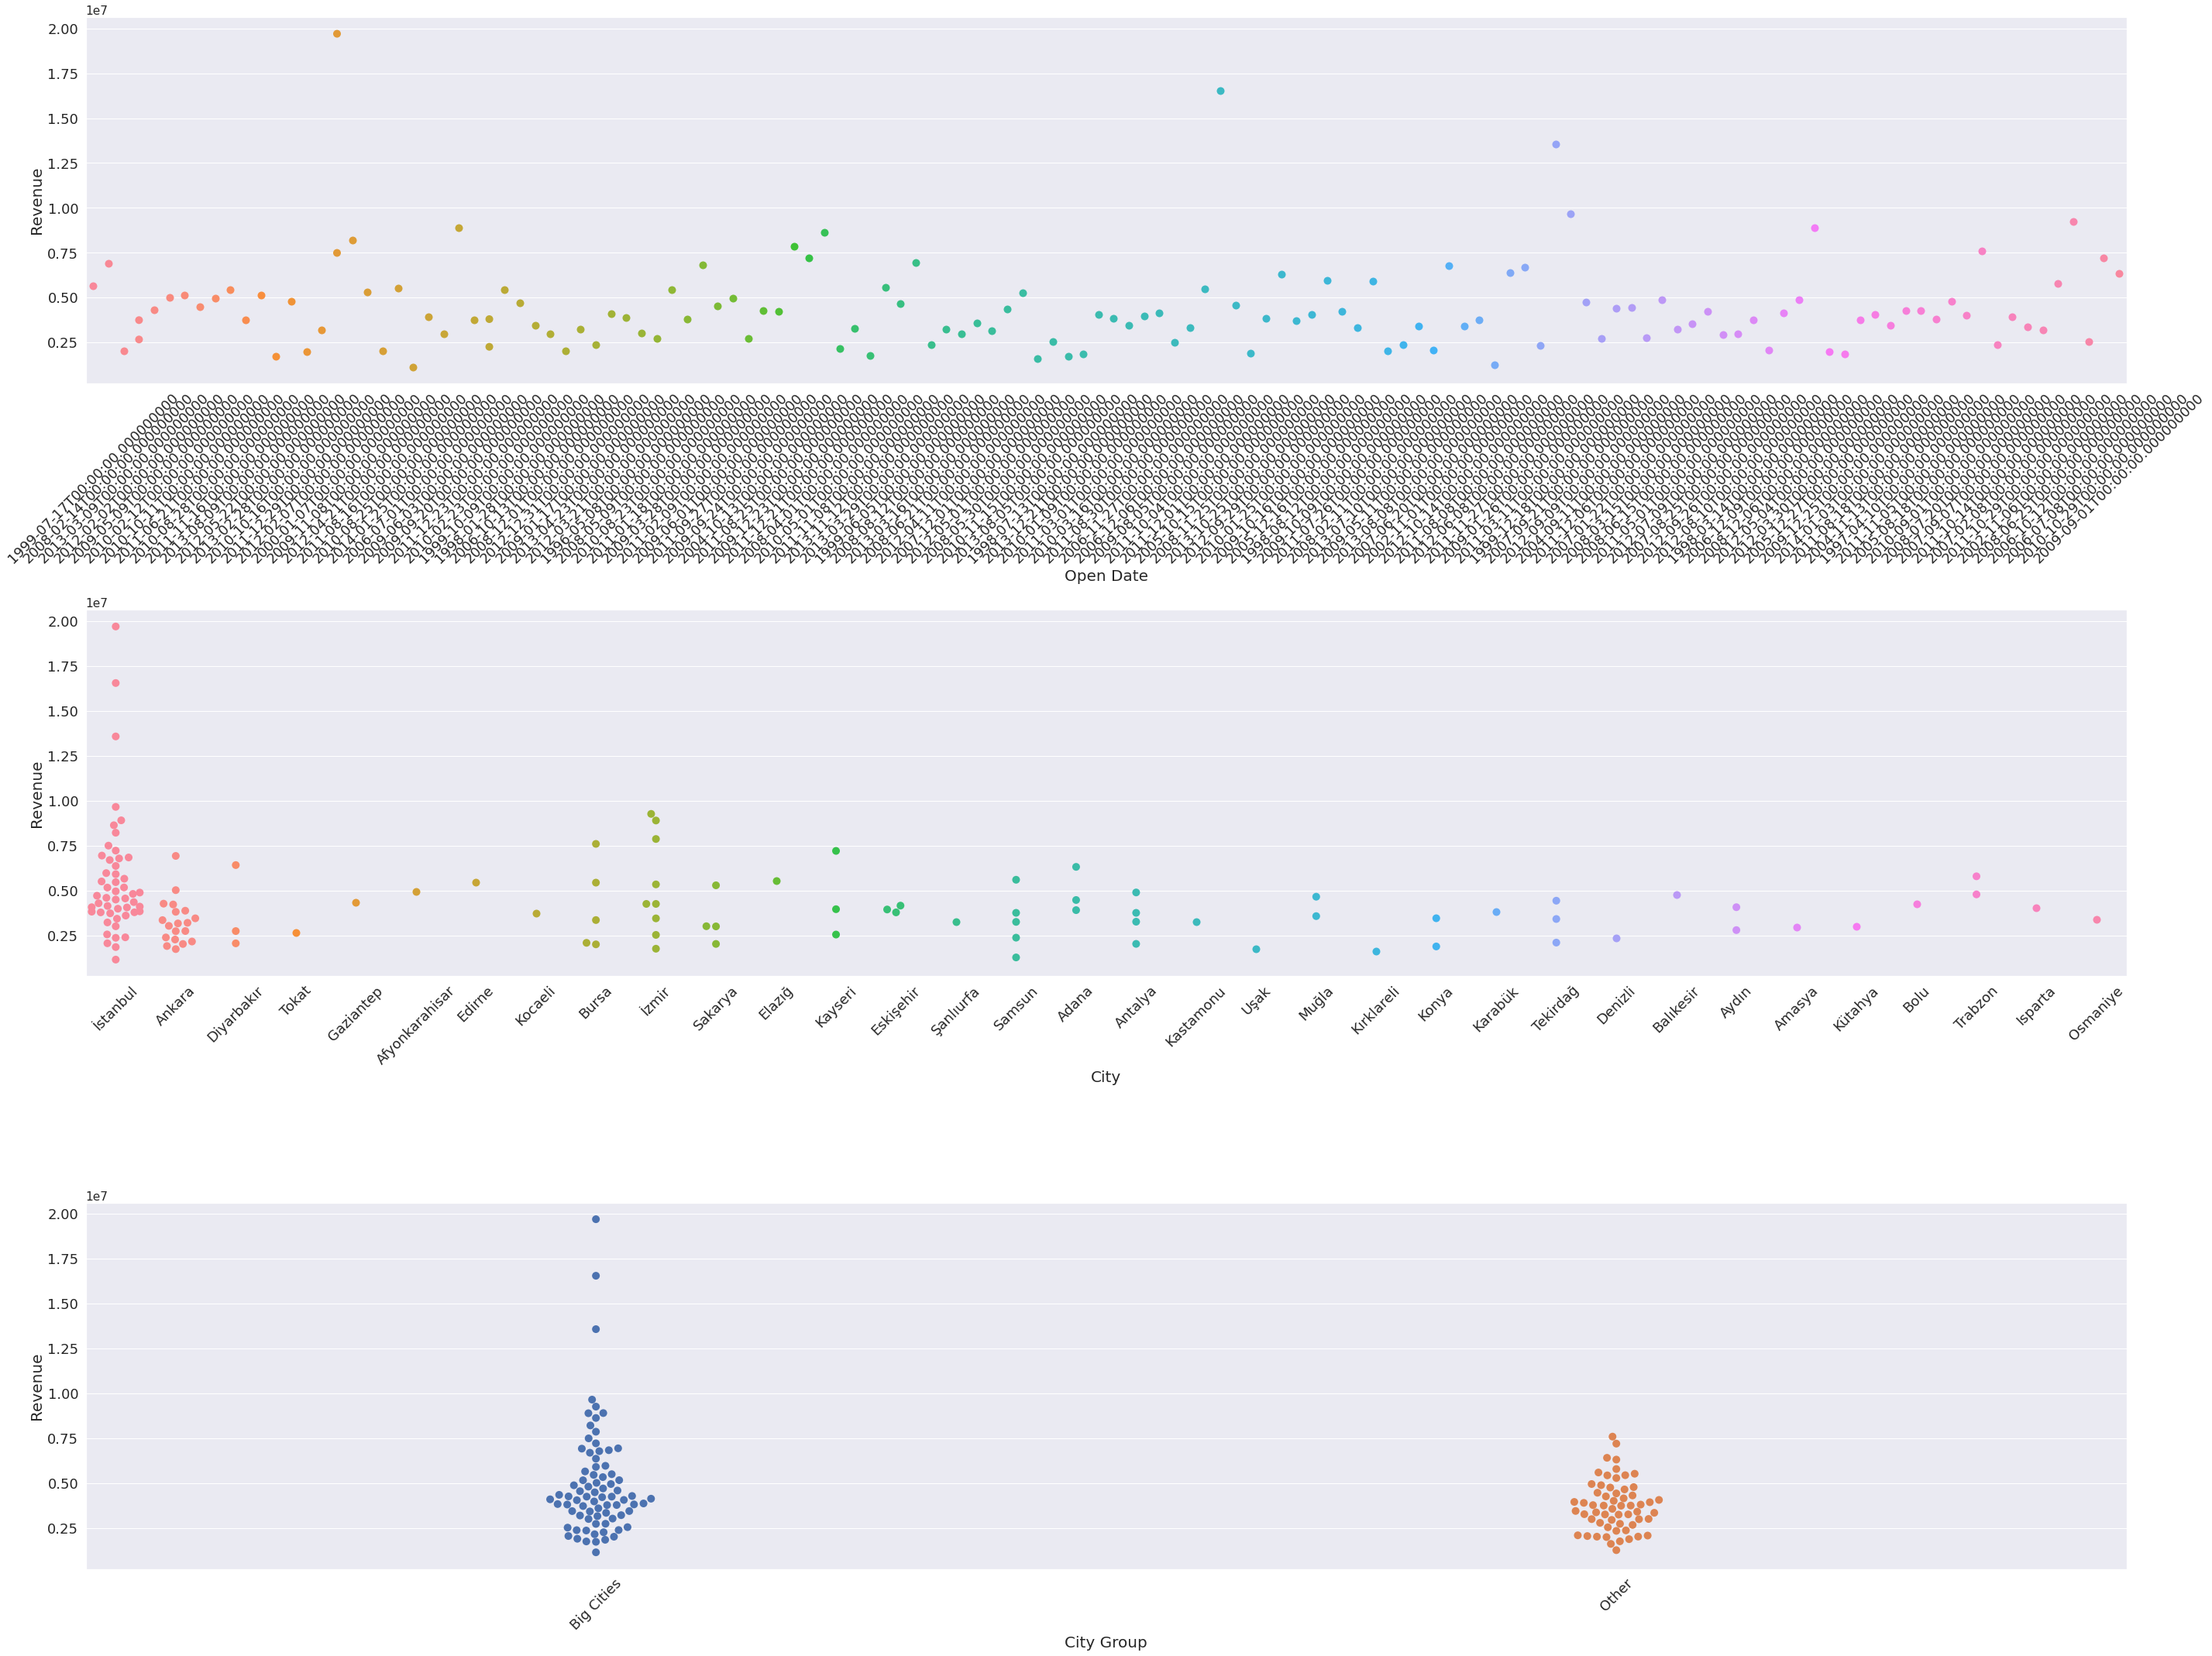

In [ ]:
#Categorical Attributes
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.swarmplot(x=variable, y='revenue', data=df, ax=subplot,size=10)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(18)
    for label in subplot.get_yticklabels():
        label.set_size(18)
fig.tight_layout()

In [ ]:
#Lets take a look at city group field 
print("--- Train set ---")
print(df['City Group'].value_counts())
print("---- Test set ----")
print(df['City Group'].value_counts())


--- Train set ---
Big Cities    78
Other         59
Name: City Group, dtype: int64
---- Test set ----
Big Cities    78
Other         59
Name: City Group, dtype: int64


In [ ]:
#Lets take a look at type field 
print("--- Train set ---")
print(df['Type'].value_counts())
print("---- Test set ----")
print(df['Type'].value_counts())

--- Train set ---
FC    76
IL    60
DT     1
Name: Type, dtype: int64
---- Test set ----
FC    76
IL    60
DT     1
Name: Type, dtype: int64


There is no MB restaurant type in the train dataset.

# Feature Transformation(One hot encoding)

In [ ]:
# Changing the open_date into datetime
# df['Open Date'] = pd.to_datetime(df['Open Date'])

In [ ]:
# Checking the options in both city, city_group, and Type
# to evaluate if categorical encoding may be necessary
print(df.City.unique(), len(df.City.unique()))
print(df['City Group'].unique(), len(df['City Group'].unique()))
print(df['Type'].unique(), len(df['Type'].unique()))

['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye'] 34
['Big Cities' 'Other'] 2
['IL' 'FC' 'DT'] 3


In [ ]:
def encode_and_bind(df, feature):
    dummies = pd.get_dummies(df[[feature]], prefix='')
    return pd.concat([df, dummies], axis=1)
df = encode_and_bind(df, 'City')
df = encode_and_bind(df, 'City Group')
df = encode_and_bind(df, 'Type')
df.head(3)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,...,Type_cat,_Adana,_Afyonkarahisar,_Amasya,_Ankara,_Antalya,_Aydın,_Balıkesir,_Bolu,_Bursa,_Denizli,_Diyarbakır,_Edirne,_Elazığ,_Eskişehir,_Gaziantep,_Isparta,_Karabük,_Kastamonu,_Kayseri,_Kocaeli,_Konya,_Kütahya,_Kırklareli,_Muğla,_Osmaniye,_Sakarya,_Samsun,_Tekirdağ,_Tokat,_Trabzon,_Uşak,_İstanbul,_İzmir,_Şanlıurfa,_Big Cities,_Other,_DT,_FC,_IL
0,1999-07-17,İstanbul,Big Cities,IL,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2008-02-14,Ankara,Big Cities,FC,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,6.0,2.0,2.0,4.0,2.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2013-03-09,Diyarbakır,Other,IL,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,4.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,6.0,1.0,3.0,12.0,2.0,7.0,2.0,7.0,5.0,7.0,...,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Model Building

###Random Forest 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('train_data_modified.csv')
data_test = pd.read_csv("/content/test.csv.zip")

In [ ]:
data = pd.get_dummies(data, columns=ctg_vars)

In [ ]:
# Add new columns to our dataset to match our input features
data['Sale Year_1995'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2001'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2003'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Day_19'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')

In [ ]:
X = data.drop('revenue', axis=1)
y = data['revenue']

In [ ]:
# Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
#Standard scaling for model efficiency
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_std = True ,with_mean = True, copy = True)
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)


In [ ]:
# Create Random Forest Regressor model
model = RandomForestRegressor(n_estimators=1000 ,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
RandomForestRegressor(n_estimators=1000, random_state=0)
# Evaluation Function

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validating MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Validating RMSE": rmse(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Validating R^2": model.score(X_valid, y_valid)}
    return scores

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
  show_scores(model)

{'Training MAE': 0.13077745454509682,
 'Training RMSE': 0.16297578828958584,
 'Training R^2': 0.8870593235011119,
 'Validating MAE': 0.2834177329359134,
 'Validating RMSE': 0.3441721613610241,
 'Validating R^2': 0.33479988608388545}

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
model_2 = CatBoostRegressor(verbose=False)
model_2.fit(X_train, y_train);
cat_pred = model_2.predict(X_valid)
show_scores(model_2)

     |████████████████████████████████| 67.4 MB 30 kB/s 


{'Training MAE': 0.009893314318375614,
 'Training RMSE': 0.011720082707313055,
 'Training R^2': 0.9994159291161707,
 'Validating MAE': 0.28455502116146864,
 'Validating RMSE': 0.3566008954430088,
 'Validating R^2': 0.28588904528325876}

###Hypertuning for Random Forest 

In [ ]:
# Number of trees
trees = np.arange(100, 1000, 100)

for i in trees:
    print("Number of Trees: {}".format(i))
    rf_test_model = RandomForestRegressor(n_estimators=i, random_state=0, criterion='mae')
    rf_test_model.fit(X_train, y_train)
    train_preds = rf_test_model.predict(X_train)
    val_preds = rf_test_model.predict(X_valid)
    print('RMSE for training set: {}'.format(rmse(y_train, train_preds)))
    print('RMSE for validation set: {} \n'.format(rmse(y_valid, val_preds)))

Number of Trees: 100


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.17326398823807257
RMSE for validation set: 0.33958894361376263 

Number of Trees: 200


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.1653889083087637
RMSE for validation set: 0.3491343953644964 

Number of Trees: 300


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16317216386275793
RMSE for validation set: 0.3511709496360674 

Number of Trees: 400


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16209333434033812
RMSE for validation set: 0.3507500144538405 

Number of Trees: 500


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.1619561181325917
RMSE for validation set: 0.34992304551565456 

Number of Trees: 600


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.1622742796047231
RMSE for validation set: 0.3475517071329703 

Number of Trees: 700


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16150938138615134
RMSE for validation set: 0.3448876425895719 

Number of Trees: 800


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16174607701389002
RMSE for validation set: 0.344956328652166 

Number of Trees: 900


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16173873695150043
RMSE for validation set: 0.3456916011491876 



In [ ]:
# Parameter dictionary for GridSearch
rf_grid = {'n_estimators': [200, 600, 800],
           'criterion': ['mse', 'mae'],
           'max_features': [0.33, 0.5, 'auto', 'sqrt'],       
           }

In [ ]:
rf_gs = GridSearchCV(estimator = RandomForestRegressor(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_gs.score(X_valid, y_valid)

0.2998811180799056

In [ ]:
rf_gs.score(X_train, y_train)

0.8905101381266461

In [ ]:
rf_gs.best_params_

{'criterion': 'mae', 'max_features': 0.33, 'n_estimators': 600}

In [ ]:
rf_gs.best_params_['n_estimators']

600

In [ ]:
rf_test_model = RandomForestRegressor(n_estimators=rf_gs.best_params_['n_estimators'], random_state=0, 
                                      criterion=rf_gs.best_params_['criterion'], max_features = rf_gs.best_params_['max_features'])
rf_test_model.fit(X_train, y_train)
train_preds = rf_test_model.predict(X_train)
val_preds = rf_test_model.predict(X_valid)
print('RMSE for training set: {}'.format(rmse(y_train, train_preds)))
print('RMSE for validation set: {}'.format(rmse(y_valid, val_preds)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features=0.33, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RMSE for training set: 0.16509093635970318
RMSE for validation set: 0.3566641671668884


In [ ]:
import xgboost as xgb

reg4 = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,
                 reg_alpha=0.75,
                 subsample=0.6,
                 seed=42)
xgbr=reg4.fit(X_train, y_train)
y_pred = reg4.predict(X_valid)

rmse = skm.mean_squared_error(y_valid, y_pred, squared=False)
mae=mean_absolute_error(y_valid,y_pred)

[12:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("RMSE: {0}".format(rmse))
print("MAE: {0}".format(mae))

RMSE: 0.2991042625975081
MAE: 0.2523181795889692


In [ ]:
xgbrscoreofModel=xgbr.score(X_train, y_train)
print("Score is calculated as: ",xgbrscoreofModel)

Score is calculated as:  0.9883935284491462


#Test 

In [ ]:
data_test = pd.read_csv("/content/test.csv.zip")

In [ ]:
data_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
data_test.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [ ]:
len(data_test.City.unique())

57

In [ ]:
data_test['Type'].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

In [ ]:
data_test['Open Date'] = pd.to_datetime(data_test['Open Date'])
data_test.sort_values(by=['Open Date'], inplace=True, ascending=True, ignore_index=True)

In [ ]:
data_test['Open Date'].dtype

dtype('<M8[ns]')

In [ ]:
data_test['Sale Day'] = data_test['Open Date'].dt.day
data_test['Sale Year'] = data_test['Open Date'].dt.year
data_test['Sale Month'] = data_test['Open Date'].dt.month

In [ ]:
data_test.drop('Open Date', axis=1, inplace=True)
data_test.drop('City', axis=1, inplace=True)

In [ ]:
ctg_vars_test = []

for col in data_test:
    if len(data_test[col].unique()) <= 31:
        ctg_vars_test.append(col)

In [ ]:
# Remove the P variables
i = 1
for k in range(1, 43):
    for p in ctg_vars_test:
        if p == "P" + str(i):
            ctg_vars_test.remove("P" + str(i))
            i += 1

In [ ]:
print(ctg_vars_test)

['City Group', 'Type', 'Sale Day', 'Sale Year', 'Sale Month']


In [ ]:
data_temp_test = data_test.copy()

In [ ]:
data_temp_test.loc[data_temp_test['Type'] == 'MB', 'Type'] = 'DT'

In [ ]:
imp_test = IterativeImputer(max_iter=5, random_state=0, missing_values=0, sample_posterior = True, min_value=1)
p_vals_test = ["P" + str(i) for i in range(1, 38)]
data_temp_test[p_vals_test] = np.round(imp_test.fit_transform(data_temp_test[p_vals_test]))

In [ ]:
data_temp_test = pd.get_dummies(data_temp_test, columns=ctg_vars_test)

In [ ]:
data_temp_test.to_csv('test_data_modified.csv', index=False)

#Making Predictions on the test set

In [ ]:
test_data = pd.read_csv('test_data_modified.csv')

In [ ]:
submission = pd.DataFrame(columns=["Id", "Prediction"])
submission["Id"] = test_data['Id']


In [ ]:

# CatBoost Model predictions
cb_pred_sub = model_2.predict(test_data.drop('Id', axis=1))
submission['Prediction'] = np.expm1(cb_pred_sub)
submission.to_csv('submission_cat_boost.csv', index=False)

In [ ]:
# Random Forest Model predictions
rf_pred_sub = model.predict(test_data.drop('Id', axis=1))
submission['Prediction'] = np.expm1(rf_pred_sub)
submission.to_csv('submission_random_forest.csv', index=False)